# 主成份分析(Principal Component Analysis)

## 這裡拿網路上一個公開資料，2019年中華職棒CPBL的資料，來進行分析
## 2.資料載點如下 : 
http://cpblstats.com/

In [228]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
%matplotlib inline

In [186]:
df = pd.read_csv("/Users/will/Desktop/資料探勘/ＰＣＡ/CPBL .csv")

In [187]:
df.head()

,NAME,G,PA,AB,RBI,R,H,1B,2B,3B,...,SO,SB,GIDP,SAC,SF,BB,IBB,HBP,CS,SB%
0,蘇智傑,120,508,444,83,77,125,66,30,2,...,103,21,5,0,1,48,7,8,7,0.75
1,朱育賢,118,507,458,105,93,159,102,26,1,...,105,0,12,2,5,38,3,1,0,0.00
2,林泓育,112,494,434,95,106,152,102,24,0,...,70,0,11,0,4,27,4,25,0,0.00
3,藍寅倫,113,493,443,65,73,141,105,25,1,...,59,7,6,8,4,21,4,13,4,0.64
4,王威晨,115,491,451,45,64,143,123,17,2,...,52,27,6,6,7,26,1,0,11,0.71


# 各種打擊指數計算

In [188]:
df ['OBS'] = (df['H'] + df['BB'] + df['HBP']) / (df['AB'] + df['BB'] + df['HBP'] + df['SF']) #上壘率

In [189]:
df ['SLG'] = df['TB'] / df['AB'] # 長打率 

In [190]:
df ['AVG'] = df['H'] / df['AB'] # 打擊率

In [191]:
df ['OBP'] = df['OBS'] + df['SLG']

In [220]:
best_player = (df['AVG']>0.3)&(df['OBS']>0.4)&(df['SLG']>0.5)

In [192]:
df.head()

,NAME,G,PA,AB,RBI,R,H,1B,2B,3B,...,SF,BB,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP
0,蘇智傑,120,508,444,83,77,125,66,30,2,...,1,48,7,8,7,0.75,0.361277,0.540541,0.281532,0.901818
1,朱育賢,118,507,458,105,93,159,102,26,1,...,5,38,3,1,0,0.00,0.394422,0.604803,0.347162,0.999226
2,林泓育,112,494,434,95,106,152,102,24,0,...,4,27,4,25,0,0.00,0.416327,0.585253,0.350230,1.001580
3,藍寅倫,113,493,443,65,73,141,105,25,1,...,4,21,4,13,4,0.64,0.363825,0.446953,0.318284,0.810778
4,王威晨,115,491,451,45,64,143,123,17,2,...,7,26,1,0,11,0.71,0.349174,0.370288,0.317073,0.719462


In [193]:
df.describe() 

,G,PA,AB,RBI,R,H,1B,2B,3B,HR,...,SF,BB,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,...,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,110.000000,110.000000,110.000000,110.000000
mean,50.612613,169.693694,151.243243,22.441441,23.666667,43.630631,30.783784,7.513514,0.702703,4.630631,...,1.288288,12.126126,0.837838,2.297297,1.423423,0.378288,0.300277,0.360876,0.241968,0.661152
std,37.381612,153.369950,136.644743,26.313731,25.253023,44.809278,31.529324,7.937099,1.480753,7.276273,...,1.899222,11.871369,1.665372,3.824787,2.168156,0.378792,0.097723,0.149472,0.086564,0.237606
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,40.500000,36.500000,4.000000,4.000000,7.500000,5.500000,1.000000,0.000000,0.000000,...,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.280039,0.295588,0.206136,0.564744
50%,41.000000,115.000000,102.000000,12.000000,14.000000,27.000000,17.000000,4.000000,0.000000,2.000000,...,1.000000,9.000000,0.000000,1.000000,1.000000,0.400000,0.319568,0.378078,0.256819,0.710745
75%,85.500000,271.000000,243.500000,32.000000,30.500000,65.000000,49.500000,11.000000,1.000000,5.000000,...,2.000000,16.500000,1.000000,3.000000,2.000000,0.730000,0.360524,0.440909,0.298790,0.798415
max,120.000000,508.000000,458.000000,108.000000,106.000000,159.000000,123.000000,30.000000,11.000000,30.000000,...,9.000000,48.000000,7.000000,25.000000,13.000000,1.000000,0.500000,0.666667,0.416667,1.076675


In [194]:
df

,NAME,G,PA,AB,RBI,R,H,1B,2B,3B,...,SF,BB,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP
0,蘇智傑,120,508,444,83,77,125,66,30,2,...,1,48,7,8,7,0.75,0.361277,0.540541,0.281532,0.901818
1,朱育賢,118,507,458,105,93,159,102,26,1,...,5,38,3,1,0,0.00,0.394422,0.604803,0.347162,0.999226
2,林泓育,112,494,434,95,106,152,102,24,0,...,4,27,4,25,0,0.00,0.416327,0.585253,0.350230,1.001580
3,藍寅倫,113,493,443,65,73,141,105,25,1,...,4,21,4,13,4,0.64,0.363825,0.446953,0.318284,0.810778
4,王威晨,115,491,451,45,64,143,123,17,2,...,7,26,1,0,11,0.71,0.349174,0.370288,0.317073,0.719462
5,林益全,117,484,431,108,71,140,87,26,0,...,8,37,7,1,1,0.50,0.373166,0.573086,0.324826,0.946251
6,郭嚴文,114,479,426,94,59,138,95,26,0,...,9,32,1,3,3,0.00,0.368085,0.504695,0.323944,0.872780
7,胡金龍,107,464,427,60,69,146,112,21,0,...,3,23,7,1,0,1.00,0.374449,0.482436,0.341920,0.856885
8,林哲瑄,112,452,414,48,66,130,90,25,6,...,2,25,2,8,2,0.88,0.363029,0.468599,0.314010,0.831628
9,林立,103,445,388,81,97,151,98,29,4,...,6,33,2,5,5,0.64,0.437500,0.639175,0.389175,1.076675


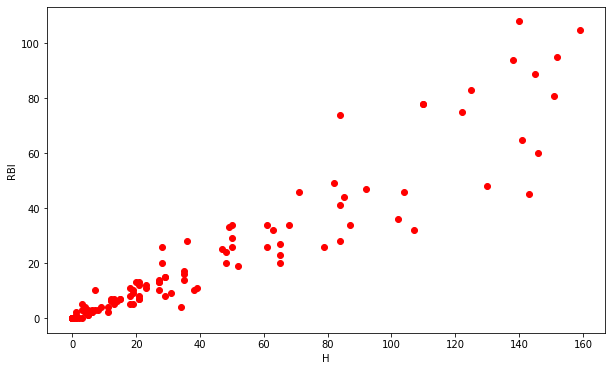

In [217]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['H'],df['RBI'],color='RED')
plt.xlabel("H")
plt.ylabel("RBI")
plt.show()

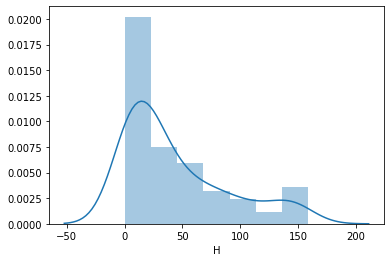

In [236]:
sns.distplot(df['H'])

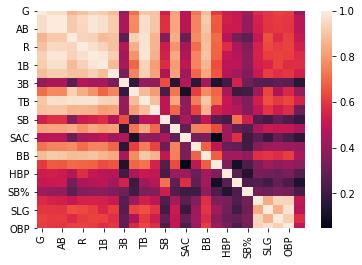

In [233]:
sns.heatmap(df.corr())

## 文獻支持


為何0.3打擊率為分類依據（影響棒球打擊表現因素之探討,陳幸苹、涂瑞洪 )
http://140.127.82.166/bitstream/987654321/1855/1/

In [195]:
# df = df[df.AB > 150]
df['rate'] = df['AVG'].apply(lambda x:0 if x<0.3 else 1)
df2= df.drop(['NAME'], axis=1)

In [198]:
df2

,G,PA,AB,RBI,R,H,1B,2B,3B,HR,...,BB,IBB,HBP,CS,SB%,OBS,SLG,AVG,OBP,rate
0,120,508,444,83,77,125,66,30,2,27,...,48,7,8,7,0.75,0.361277,0.540541,0.281532,0.901818,0
1,118,507,458,105,93,159,102,26,1,30,...,38,3,1,0,0.00,0.394422,0.604803,0.347162,0.999226,1
2,112,494,434,95,106,152,102,24,0,26,...,27,4,25,0,0.00,0.416327,0.585253,0.350230,1.001580,1
3,113,493,443,65,73,141,105,25,1,10,...,21,4,13,4,0.64,0.363825,0.446953,0.318284,0.810778,1
4,115,491,451,45,64,143,123,17,2,1,...,26,1,0,11,0.71,0.349174,0.370288,0.317073,0.719462,1
5,117,484,431,108,71,140,87,26,0,27,...,37,7,1,1,0.50,0.373166,0.573086,0.324826,0.946251,1
6,114,479,426,94,59,138,95,26,0,17,...,32,1,3,3,0.00,0.368085,0.504695,0.323944,0.872780,1
7,107,464,427,60,69,146,112,21,0,13,...,23,7,1,0,1.00,0.374449,0.482436,0.341920,0.856885,1
8,112,452,414,48,66,130,90,25,6,9,...,25,2,8,2,0.88,0.363029,0.468599,0.314010,0.831628,1
9,103,445,388,81,97,151,98,29,4,20,...,33,2,5,5,0.64,0.437500,0.639175,0.389175,1.076675,1


In [199]:
df2 = df2.fillna(0)

In [200]:
df2.shape

(111, 26)

In [201]:
from sklearn.decomposition import PCA

In [202]:
pca=PCA(n_components=2)  
df3=pca.fit_transform(df2)  

In [203]:
df3

array([[ 504.59183352,   21.41991435],
       [ 537.918605  ,   64.77730299],
       [ 502.12109264,   54.28123928],
       [ 479.79158272,  -15.06524748],
       [ 473.00646333,  -53.73943375],
       [ 485.06328475,   46.63013784],
       [ 466.66703264,   14.62995517],
       [ 452.1952267 ,    0.9886015 ],
       [ 427.47010672,  -11.84632973],
       [ 436.44241937,   64.15135643],
       [ 419.79893117,   60.24532814],
       [ 396.13978754,   22.52580581],
       [ 375.54938305,   11.13646352],
       [ 353.17632475,  -36.51915863],
       [ 336.59411056,  -25.06697304],
       [ 356.28021627,   53.62857371],
       [ 287.40348495,  -30.60426924],
       [ 291.89389597,  -25.56272731],
       [ 306.18605384,   19.73704079],
       [ 254.7368915 ,  -61.60761517],
       [ 227.13489775,  -23.47867036],
       [ 223.17217663,  -32.15607922],
       [ 232.76151156,   -3.01153901],
       [ 202.74972382,  -31.46090694],
       [ 203.17542088,    3.19746071],
       [ 174.61700281,   

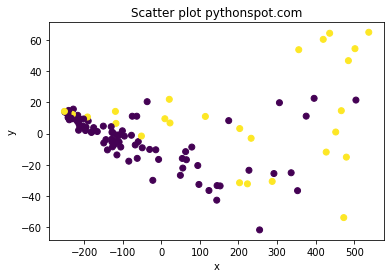

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# # Create data
# N = 500
# x = np.random.rand(N)
# y = np.random.rand(N)
# colors = (0,0,0)
# area = np.pi*3

# Plot
plt.scatter(df3[:,0], df3[:,1], c = df['rate'])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [205]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.98364719 0.00859573]
